# Example of using autoencoders to predict typical and anomaly data

In [165]:
import numpy as np
import keras as K
import matplotlib.pyplot as plt
from datetime import datetime
import os
from astropy.io import fits 
np.random.seed(1)

In [166]:
# open fits file
hdu = fits.open('/home/sbenzvi/test_spectra_autoencoder.fits')

In [167]:
# grab x data
x_data = hdu['NORM'].data
norm_x = (x_data - np.min(x_data)) /(np.max(x_data)-np.min(x_data))

In [168]:
# split training set and test set
x_train = norm_x[-9000:]
x_test = norm_x[:1000]

In [169]:
# define autoencoder 1000-500-250-500-1000 CNN, tanh activation between nodes.
# Note have to batch-normalize if using relu
my_init = K.initializers.glorot_uniform(seed=1)
autoenc = K.models.Sequential()
autoenc.add(K.layers.Dense(input_dim=1000, units=500, 
  activation='tanh', kernel_initializer=my_init))
autoenc.add(K.layers.Dense(units=250, 
  activation='tanh', kernel_initializer=my_init))
autoenc.add(K.layers.Dense(units=500, 
  activation='tanh', kernel_initializer=my_init)) 
autoenc.add(K.layers.Dense(units=1000,
  activation='tanh', kernel_initializer=my_init)) 

In [170]:
# Compile with Adam Optimizer
simple_adam = K.optimizers.adam()  
autoenc.compile(loss='mean_squared_error',
  optimizer=simple_adam)

In [171]:
# create checkpoint directory
ct = datetime.now().strftime("%m-%d_%H:%M:%S")
basedir = f'/scratch/dgandhi/desi/time-domain-bkup/models/autoencoder/run({ct})/'
path= basedir+'weights.Ep{epoch:02d}-ValLoss{val_loss:.2f}.hdf5'
os.makedirs(basedir)
checkpoint = K.callbacks.ModelCheckpoint(path, monitor='val_loss', verbose=1,
                                       save_best_only=True, mode='max',)

In [172]:
# start training
max_epochs = 100
h = autoenc.fit(x_train, x_train, batch_size=30, validation_data=(x_test, x_test),
  epochs=max_epochs, verbose=1, callbacks=[checkpoint])

Train on 9000 samples, validate on 1000 samples
Epoch 1/100
9000/9000 [==============================] - 7s 735us/step - loss: 0.0197 - val_loss: 0.0166

Epoch 00001: val_loss improved from -inf to 0.01659, saving model to /scratch/dgandhi/desi/time-domain-bkup/models/autoencoder/run(06-26_15:50:56)/weights.Ep01-ValLoss0.02.hdf5
Epoch 2/100
9000/9000 [==============================] - 6s 644us/step - loss: 0.0163 - val_loss: 0.0166

Epoch 00002: val_loss improved from 0.01659 to 0.01660, saving model to /scratch/dgandhi/desi/time-domain-bkup/models/autoencoder/run(06-26_15:50:56)/weights.Ep02-ValLoss0.02.hdf5
Epoch 3/100
9000/9000 [==============================] - 6s 642us/step - loss: 0.0163 - val_loss: 0.0165

Epoch 00003: val_loss did not improve from 0.01660
Epoch 4/100
9000/9000 [==============================] - 6s 641us/step - loss: 0.0162 - val_loss: 0.0163

Epoch 00004: val_loss did not improve from 0.01660
Epoch 5/100
9000/9000 [==============================] - 6s 645us/ste

9000/9000 [==============================] - 6s 648us/step - loss: 0.0099 - val_loss: 0.0108

Epoch 00051: val_loss did not improve from 0.01660
Epoch 52/100
9000/9000 [==============================] - 6s 645us/step - loss: 0.0098 - val_loss: 0.0108

Epoch 00052: val_loss did not improve from 0.01660
Epoch 53/100
9000/9000 [==============================] - 6s 647us/step - loss: 0.0099 - val_loss: 0.0108

Epoch 00053: val_loss did not improve from 0.01660
Epoch 54/100
9000/9000 [==============================] - 6s 645us/step - loss: 0.0098 - val_loss: 0.0108

Epoch 00054: val_loss did not improve from 0.01660
Epoch 55/100
9000/9000 [==============================] - 6s 660us/step - loss: 0.0098 - val_loss: 0.0107

Epoch 00055: val_loss did not improve from 0.01660
Epoch 56/100
9000/9000 [==============================] - 6s 654us/step - loss: 0.0098 - val_loss: 0.0108

Epoch 00056: val_loss did not improve from 0.01660
Epoch 57/100
9000/9000 [==============================] - 6s 665u

# Function of Loss over Epochs

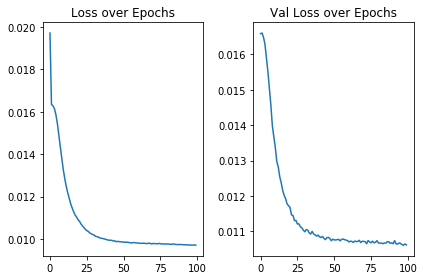

In [179]:
plt.subplot(1,2,1)
plt.title('Loss over Epochs')
plt.plot(h.history['loss'])
plt.subplot(1,2,2)
plt.title('Val Loss over Epochs')
plt.plot(h.history['val_loss'])
plt.tight_layout()
plt.show()

# Example of Predicting a Typical Data Vector

In [180]:
# Predict validation set again
x_predict = autoenc.predict(x=x_test, batch_size=30)

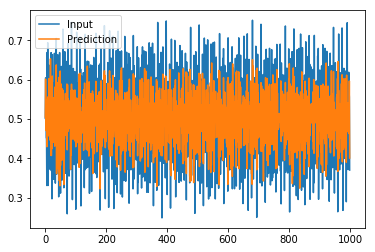

In [185]:
plt.plot(x_test[19], label='Input')
plt.plot(x_predict[19], label='Prediction')
plt.legend()
plt.show()

# Example of Predicting an Anomaly Vector

In [186]:
# Get anomaly data
x_anamolies = hdu['ANMNOISY'].data
norm_x_anom = (x_anamolies - np.min(x_anamolies)) /(np.max(x_anamolies)-np.min(x_anamolies))

In [187]:
# Predict anomalies
predict_x_anom = autoenc.predict(norm_x_anom, batch_size=30)

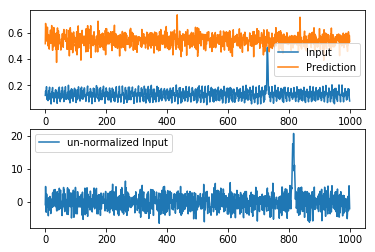

In [192]:
plt.subplot(2,1,1)
plt.plot(norm_x_anom[1], label='Input')
plt.plot(predict_x_anom[1], label='Prediction')
plt.legend()
plt.subplot(2,1,2)
plt.plot(x_anamolies[0], label='un-normalized Input')
plt.legend()
plt.show()